<a href="https://colab.research.google.com/github/NimishPrakash/end-to-end-Predicting-Heart-Disease-/blob/main/end_to_end_Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease Using Different Models

This notebook looks into using various Python - based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

## Data

The original data comes from the Cleavland data from the UCI Machine Learning Repository.https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle.https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

# Packages Rquired

In [1]:
# Regular EDA and Plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,2,1\

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# how many of each classes are there
df['target'].value_counts()

,count
target,
1,526
0,499


<Axes: xlabel='target'>

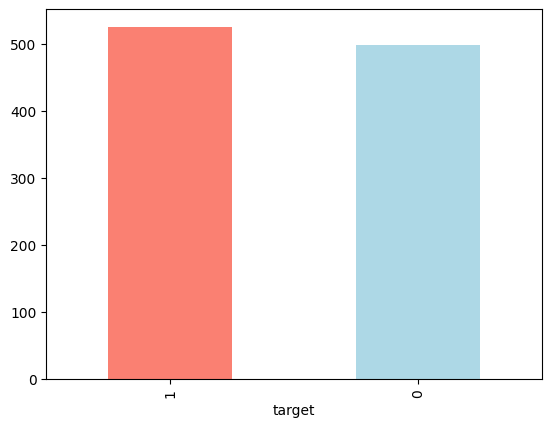

In [9]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

,count
sex,
1,713
0,312


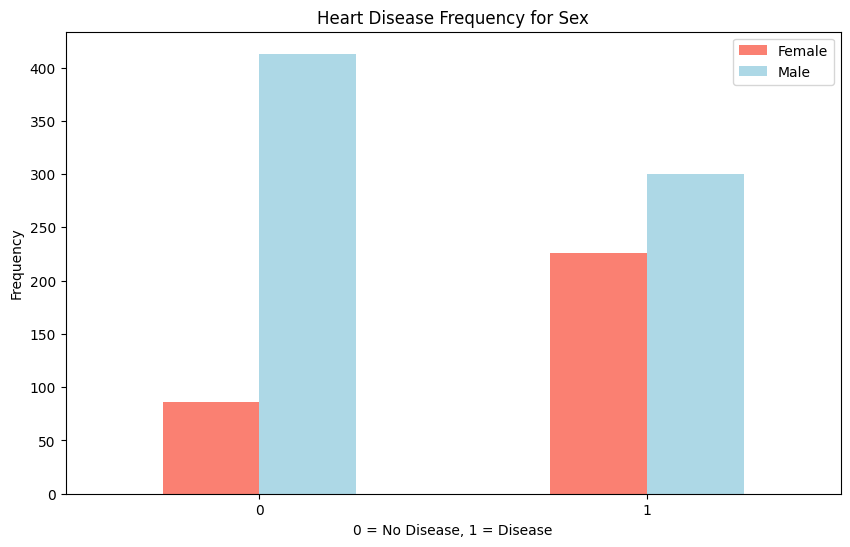

In [17]:
# compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind='bar',figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.legend(['Female', 'Male'])
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Age vs Max Heart Rate

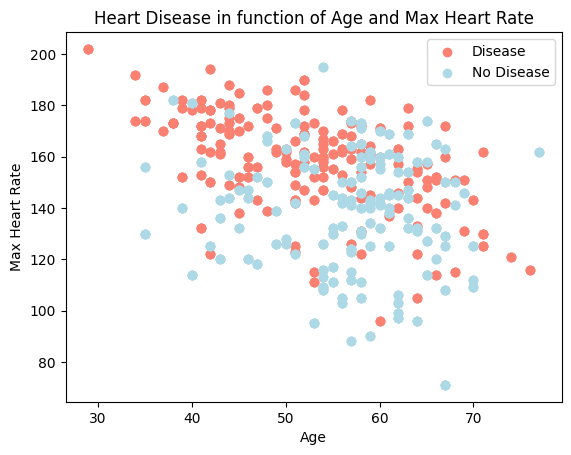

In [22]:
# Scatter with positive
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatter with negative
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.title('Heart Disease with Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

## Correlation Matrix

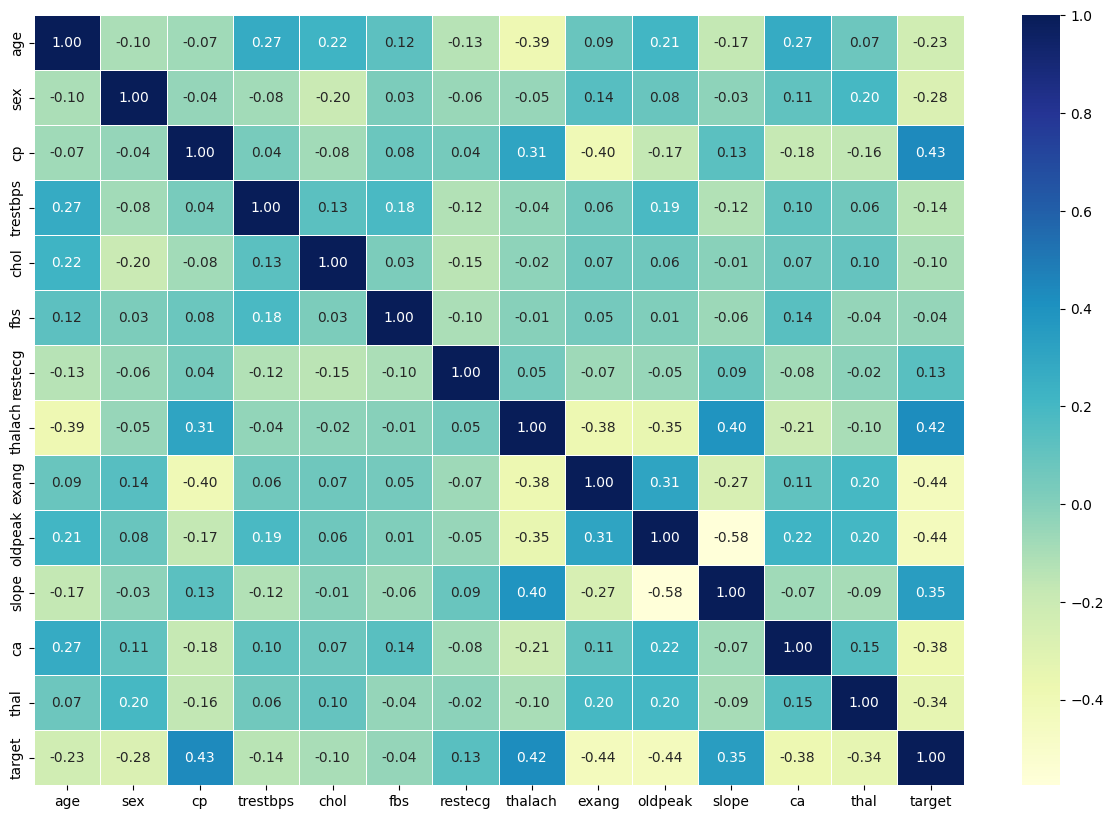

In [23]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')
plt.show()

**Negative Correlation** means one variable increases as the other decreases

**Positive Correlation** means one variable increases as the other increases

## Model Preparation

In [36]:
# Split the data
x = df.drop('target', axis=1)
y = df['target']

In [37]:
# Splitting in trainning and testing sets
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=14)

In [38]:
print(y_test.unique())
len(y_train)

[1 0]


717

This is a Classification Problem, so we are going to test:
- Logistic Regression
- K-Neighbors Classifier
- Random Forest Classifier

In [39]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Function to fit and score the models
def models_score(models, x_train, x_test, y_train, y_test):
  model_scores = {}    # dictionary to keep model scores
  for name, model in models.items():    # loop through the models
    model.fit(x_train, y_train)
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [40]:
model_scores = models_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.827922077922078,
 'KNN': 0.7272727272727273,
 'Random Forest': 0.9902597402597403}

Clearly Random Forest is the best model for this data set